# Convolution 4 layer network

This notebook uses a 4 layer convolution network built using the Keras [sequential model](https://keras.io/getting-started/sequential-model-guide/) to classify images in the 
[CIFAR-10 ](https://www.cs.toronto.edu/~kriz/cifar.html) dataset.

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

In [1]:
import os
# uncomment the following line to run only on CPU
# restart the Jupyter notebook before each change
# os.environ["CUDA_VISIBLE_DEVICES"] = ""

# 1 minutes 52 seconds for 5 epochs on GPU
# 20 minutes 38 seconds for 5 epochs on CPU

import numpy as np

In [91]:
from keras.datasets import cifar10
import matplotlib.pyplot as plt
%matplotlib inline

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, Activation
import pandas as pd

from sklearn.metrics import confusion_matrix

import seaborn as sns

from keras_tqdm import TQDMNotebookCallback

In [92]:
from keras import backend as K
K.image_data_format()

'channels_last'

Loading the CIFAR-10 dataset training and test images

In [93]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('There are {} training images each of size {}.'.format(
    x_train.shape[0], x_train.shape[1:3]))

print('There are {} test images.'.format(x_test.shape[0]))

There are 50000 training images each of size (32, 32).
There are 10000 test images.


The images are divided into 10 non-overlapping categories

In [94]:
cifar10_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
                 'dog', 'frog', 'horse', 'ship', 'truck']

Matplotlib is used to plot the first 10 images

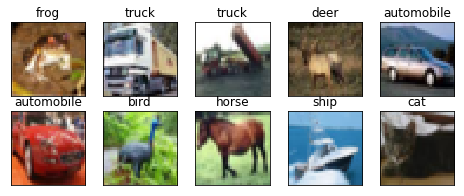

In [95]:
def plot_image(img, title, ax):
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.imshow(img)
    ax.set_title(title)
    
nrows = 2
ncols = 5
fig, ax_list = plt.subplots(nrows=nrows, ncols=ncols)
fig.set_size_inches(w=8, h=3)
for id_x in range(nrows):
    for id_y in range(ncols):
        id_loc = id_x * ncols + id_y
        plot_image(x_train[id_loc], cifar10_names[y_train[id_loc][0]],
                   ax_list[id_x, id_y])

Display the devices available for Tensorflow & Keras

In [9]:
from tensorflow.python.client import device_lib
for item in device_lib.list_local_devices():
    print('name: {}, memory {}'.format(item.name, item.memory_limit))

name: /device:CPU:0, memory 268435456
name: /device:GPU:0, memory 357957632


In [10]:
num_classes = 10
batch_size = 128
epochs = 100

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

Convert class vectors to binary class matrices

In [11]:
y_train_bin = keras.utils.to_categorical(y_train.squeeze(), num_classes)
y_test_bin = keras.utils.to_categorical(y_test.squeeze(), num_classes)

Create a Convolution model with four layers

In [12]:
K.clear_session()

model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

In [13]:
# model.summary()

In [14]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.rmsprop(lr=0.0001, decay=1e-6),
              metrics=['accuracy'])

In [15]:
fit = model.fit(x_train, y_train_bin, batch_size=batch_size, epochs=epochs,
                validation_data=(x_test, y_test_bin), shuffle=True,
                verbose=0, callbacks=[TQDMNotebookCallback()])

HBox(children=(IntProgress(value=0, description='Training'), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 0', max=50000), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 1', max=50000), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 2', max=50000), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 3', max=50000), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 4', max=50000), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 5', max=50000), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 6', max=50000), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 7', max=50000), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 8', max=50000), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 9', max=50000), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 10', max=50000), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 11', max=50000), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 12', max=50000), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 13', max=50000), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 14', max=50000), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 15', max=50000), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 16', max=50000), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 17', max=50000), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 18', max=50000), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 19', max=50000), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 20', max=50000), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 21', max=50000), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 22', max=50000), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 23', max=50000), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 24', max=50000), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 25', max=50000), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 26', max=50000), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 27', max=50000), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 28', max=50000), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 29', max=50000), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 30', max=50000), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 31', max=50000), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 32', max=50000), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 33', max=50000), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 34', max=50000), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 35', max=50000), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 36', max=50000), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 37', max=50000), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 38', max=50000), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 39', max=50000), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 40', max=50000), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 41', max=50000), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 42', max=50000), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 43', max=50000), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 44', max=50000), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 45', max=50000), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 46', max=50000), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 47', max=50000), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 48', max=50000), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 49', max=50000), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 50', max=50000), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 51', max=50000), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 52', max=50000), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 53', max=50000), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 54', max=50000), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 55', max=50000), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 56', max=50000), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 57', max=50000), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 58', max=50000), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 59', max=50000), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 60', max=50000), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 61', max=50000), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 62', max=50000), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 63', max=50000), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 64', max=50000), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 65', max=50000), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 66', max=50000), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 67', max=50000), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 68', max=50000), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 69', max=50000), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 70', max=50000), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 71', max=50000), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 72', max=50000), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 73', max=50000), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 74', max=50000), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 75', max=50000), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 76', max=50000), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 77', max=50000), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 78', max=50000), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 79', max=50000), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 80', max=50000), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 81', max=50000), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 82', max=50000), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 83', max=50000), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 84', max=50000), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 85', max=50000), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 86', max=50000), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 87', max=50000), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 88', max=50000), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 89', max=50000), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 90', max=50000), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 91', max=50000), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 92', max=50000), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 93', max=50000), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 94', max=50000), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 95', max=50000), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 96', max=50000), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 97', max=50000), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 98', max=50000), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 99', max=50000), HTML(value='')))

Plot the training and validation loss and accuracy

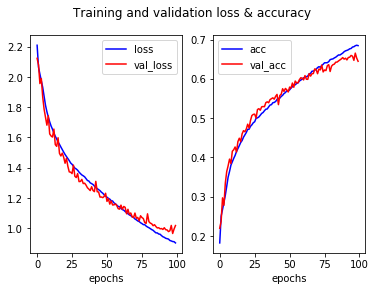

In [16]:
def plot_loss_accuracy(fit):
    
    def plot_measure_by_epoch(fit, item1, item2, ax):
        ax.plot(fit.history[item1], c='blue')
        ax.plot(fit.history[item2], c='red')
        ax.set_xlabel('epochs')
        ax.legend([item1, item2])
        
    fig, ax = plt.subplots(nrows=1, ncols=2)
    plot_measure_by_epoch(fit, 'loss', 'val_loss', ax[0])
    plot_measure_by_epoch(fit, 'acc', 'val_acc', ax[1])
    fig.suptitle('Training and validation loss & accuracy')
    
plot_loss_accuracy(fit)

In [18]:
cmatrix = confusion_matrix(y_test, y_predict)
df_cm = pd.DataFrame(cmatrix)
df_cm

,0,1,2,3,4,5,6,7,8,9
0,700,37,25,14,6,9,8,4,144,53
1,12,826,1,11,0,4,3,0,46,97
2,93,19,401,106,76,105,80,41,36,43
3,31,28,39,508,34,176,58,41,36,49
4,50,15,55,108,468,54,75,116,33,26
5,22,13,29,188,32,565,22,76,25,28
6,8,24,27,104,30,26,714,16,29,22
7,19,12,14,45,35,67,6,738,8,56
8,47,52,2,10,1,2,2,7,842,35
9,30,176,4,12,0,7,6,16,64,685


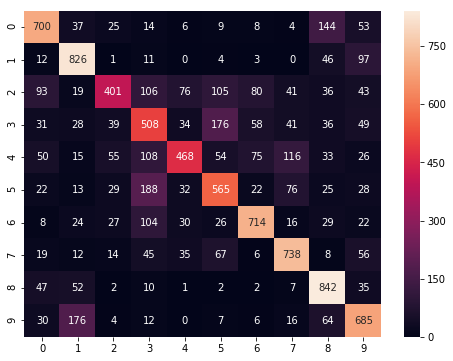

In [21]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(df_cm, annot=True, fmt='.0f', ax=ax)

In [130]:
y_test = y_test.squeeze()
y_predict = model.predict_classes(x_test)
err_idx = np.where(y_test != y_predict)[0]
correct_idx = np.where(y_test == y_predict)[0]

10000/10000 [==============================] - 1s 138us/step


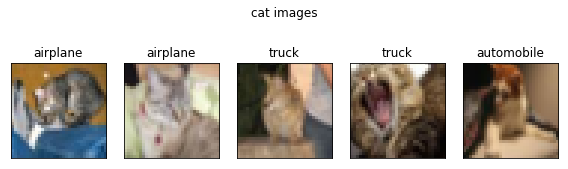

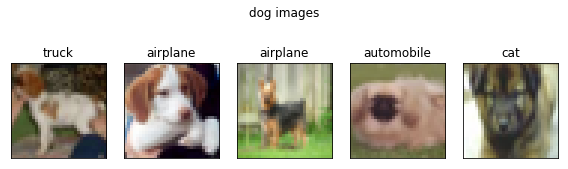

In [132]:
nrows = 2
ncols = 5

def plot_row(ncols, category, selected_idx):
    title = '{} images'.format(cifar10_names[category])
    fig, ax_list = plt.subplots(nrows=1, ncols=ncols)
    fig.set_size_inches(w=8, h=3)
    category_selected = selected_idx[y_test[selected_idx] == category]
    for idx in range(ncols):
        image_idx = category_selected[idx]
        predict_name = cifar10_names[y_predict[image_idx]]
        plot_image(x_test[image_idx], predict_name, ax_list[idx])
    fig.tight_layout()
    fig.suptitle(title)

plot_row(5, 3, err_idx)
plot_row(5, 5, err_idx)

## Links

Confusion matrix
* https://blog.plon.io/tutorials/cifar-10-classification-using-keras-tutorial/

Measuring performance
* https://machinelearningmastery.com/custom-metrics-deep-learning-keras-python/
* https://machinelearningmastery.com/evaluate-performance-deep-learning-models-keras/